In [1]:
# Ex 2.4
# This is an exercise on identifying autocorrelation patterns

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from typing import List
from typing import Dict
from pandas.plotting import autocorrelation_plot

In [2]:
def mse(s: pd.Series) -> float:
    series = np.asarray(s)
    mean_s = np.mean(series)
    mse = np.sum((series - mean_s) ** 2 / len(series))
    return mse

def acf(series, lag):
    n = len(series)
    data = np.asarray(series)
    mean = np.mean(data)
    
    c0 = mse(series) * n
    def r(h):
        acf_lag = ((data[ : n - h] - mean) * (data[h : ] - mean)).sum() / c0
        return round(acf_lag, 3)
    
    
    acf_coeffs = round(r(lag), 3)
    return acf_coeffs

def calculate_acf(series: pd.Series, max_lag=10) -> Dict[int, float]:
    from collections import OrderedDict
    data = OrderedDict()
    for lag in range(1, max_lag + 1):
        data[lag] = acf(series, lag)
    return data

def plot_acf(s, max_lag):
    ts = pd.Series(s)
    acf = calculate_acf(ts, max_lag)

    cf = 1.96 / np.sqrt(len(s))
    lags = acf.keys()
    y = acf.values()
    
    plt.ylim((-1.0, 1.0))
    plt.grid()
    
    plt.axhline(y=cf, color='gray')
    plt.axhline(y=-cf, color='gray')
    plt.axhline(color='black')
    
    plt.xlabel('Lags')
    plt.ylabel('Autocorrelation')
    
    xint_prime = [i for i in range(1, max_lag + 1)]
    d = len(xint_prime) // 5
    xint = [i for i in xint_prime if i % d == 1]
    
    plt.xticks(xint)
    plt.plot(lags, y, lw=1.5)
    plt.show()

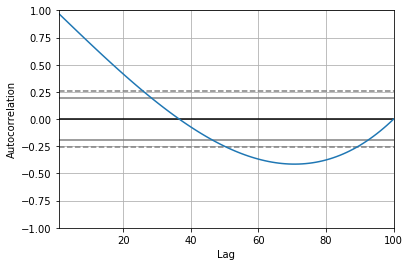

In [3]:
y = [5 + 3 * x for x in range(0, 100)]

ts1 = pd.Series(y)
acf_ts1 = calculate_acf(ts1, 20)
# constant autocorr
autocorrelation_plot(ts1)

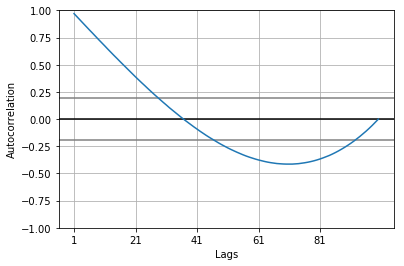

In [4]:
plot_acf(y, max_lag=100)

In [5]:
y_2 = []
for i in range(0, 100):
    if i % 2 == 0:
        y_2.append(3 + 5 * i)
    else:
        y_2.append(i**2 /10.0)


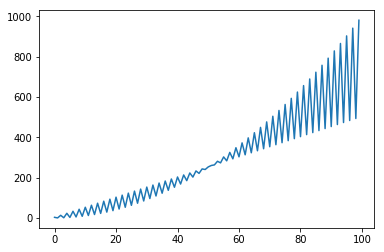

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(range(0, 100), y_2)
plt.show()

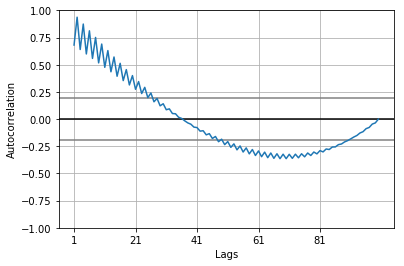

In [7]:
plot_acf(y_2, 100)

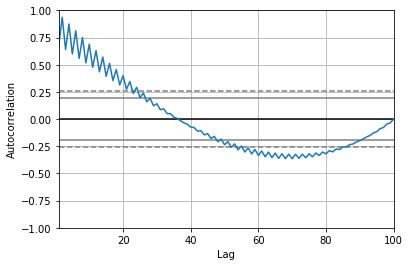

In [8]:
autocorrelation_plot(pd.Series(y_2))
plt.show()

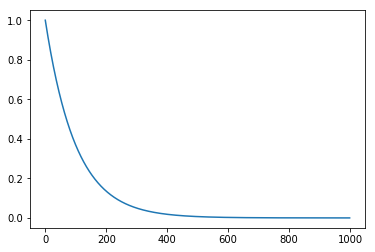

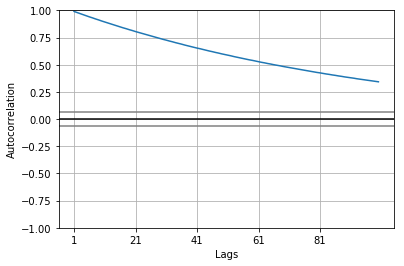

In [9]:
y_3 = [np.exp(-x/100.0) for x in np.arange(0.0, 1000.0, 1)]
plt.plot([x for x in np.arange(0.0, 1000.0)], y_3)
plt.show()

plot_acf(y_3, max_lag=100)

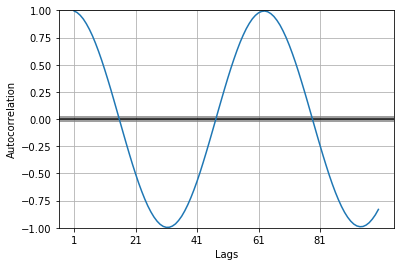

In [10]:
y_4 = [np.sin(x) for x in np.arange(0.0, 1000.0, 0.1)]
plot_acf(y_4, max_lag=100)

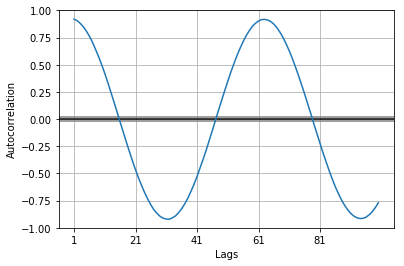

In [11]:
y_5 = [np.sin(x) + np.cos(x) + np.random.random() for x in np.arange(0.0, 1000.0, 0.1)]
plot_acf(y_5, max_lag=100)